In [1]:
import json
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix, balanced_accuracy_score, precision_score
import numpy as np
import random
import gzip
import dateutil.parser
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
answers = {}

In [3]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [4]:
### Question 1

In [5]:
f = gzip.open("./../data/fantasy_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [6]:
# Get max review length
MAX_REVIEW_LENGTH = max(list(map(lambda x: len(x['review_text']), dataset)))
MAX_REVIEW_LENGTH

14306

In [7]:
def feature(datum):
    return len(datum['review_text'])/MAX_REVIEW_LENGTH

In [8]:
# Filter down and add intercept
X = list(map(feature, dataset))
X = list(map(lambda x: [1, x], X))
Y = list(map(lambda x: x['rating'], dataset))

In [9]:
# Train model and obtain coef and MSE
reg = linear_model.LinearRegression().fit(X, Y)

theta = reg.coef_
MSE = mean_squared_error(Y, reg.predict(X))

In [10]:
answers['Q1'] = [theta[0], theta[1], MSE]

In [11]:
assertFloatList(answers['Q1'], 3)

In [12]:
### Question 2

In [13]:
for d in dataset:
    t = dateutil.parser.parse(d['date_added'])
    d['parsed_date'] = t

In [14]:
# Clean dataset
df = pd.DataFrame(dataset)
df['parsed_date'] = pd.to_datetime(df['parsed_date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df['weekday'] = df['parsed_date'].dt.strftime('%A')
df['month'] = df['parsed_date'].dt.strftime('%B')
df['review_text_prop'] = list(map(lambda x: len(x['review_text'])/MAX_REVIEW_LENGTH, dataset))
one_hot_df = pd.get_dummies(df, columns=['weekday', 'month'], prefix=['weekday', 'month'])

one_hot_df = one_hot_df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments', 'review_text', 'parsed_date', 'weekday_Monday', 'month_January'])
df = df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments', 'review_text', 'parsed_date'])

In [15]:
# Obtain Features
X = one_hot_df[one_hot_df.columns.difference(['rating'])]
Y = one_hot_df['rating']

In [16]:
answers['Q2'] = [np.append(X.loc[0].values, [1]),np.append(X.loc[1].values, [1])]

In [17]:
assertFloatList(answers['Q2'][0], 19)
assertFloatList(answers['Q2'][1], 19)

In [18]:
### Question 3

In [19]:
# Clean datasets
df['weekday'] = LabelEncoder().fit_transform(df['weekday'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['intercept'] = 1
one_hot_df['intercept'] = 1

In [20]:
# Obtain features
direct_X = df[df.columns.difference(['rating'])]
direct_Y = df['rating']
one_hot_X = one_hot_df[one_hot_df.columns.difference(['rating'])]
one_hot_Y = one_hot_df['rating']

In [21]:
# Train models
direct_reg = linear_model.LinearRegression().fit(direct_X, direct_Y)
one_hot_reg = linear_model.LinearRegression().fit(one_hot_X, one_hot_Y)

In [22]:
# Obtain MSEs
mse2 = mean_squared_error(direct_Y, direct_reg.predict(direct_X))
mse3 = mean_squared_error(one_hot_Y, one_hot_reg.predict(one_hot_X))

In [23]:
answers['Q3'] = [mse2, mse3]

In [24]:
assertFloatList(answers['Q3'], 2)

In [25]:
### Question 4

In [26]:
random.seed(0)
random.shuffle(dataset)

In [27]:
# Re-clean everything
df = pd.DataFrame(dataset)
df['parsed_date'] = pd.to_datetime(df['parsed_date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df['weekday'] = df['parsed_date'].dt.strftime('%A')
df['month'] = df['parsed_date'].dt.strftime('%B')
df['review_text_prop'] = list(map(lambda x: len(x['review_text'])/MAX_REVIEW_LENGTH, dataset))
one_hot_df = pd.get_dummies(df, columns=['weekday', 'month'], prefix=['weekday', 'month'])

df['weekday'] = LabelEncoder().fit_transform(df['weekday'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['intercept'] = 1
one_hot_df['intercept'] = 1

one_hot_df = one_hot_df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments', 'review_text', 'parsed_date', 'weekday_Monday', 'month_January'])
df = df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments', 'review_text', 'parsed_date'])

direct_X = df[df.columns.difference(['rating'])]
direct_Y = df['rating']
one_hot_X = one_hot_df[one_hot_df.columns.difference(['rating'])]
one_hot_Y = one_hot_df['rating']

In [28]:
train2, test2 = direct_X[:len(direct_X)//2], direct_X[len(direct_X)//2:]
train3, test3 = one_hot_X[:len(one_hot_X)//2], one_hot_X[len(one_hot_X)//2:]
trainY, testY = direct_Y[:len(direct_Y)//2], direct_Y[len(direct_Y)//2:]

In [29]:
# Train models
direct_reg = linear_model.LinearRegression().fit(train2, trainY)
one_hot_reg = linear_model.LinearRegression().fit(train3, trainY)

In [30]:
# Obtain MSEs
test_mse2 = mean_squared_error(testY, direct_reg.predict(test2))
test_mse3 = mean_squared_error(testY, one_hot_reg.predict(test3))

In [31]:
answers['Q4'] = [test_mse2, test_mse3]

In [32]:
assertFloatList(answers['Q4'], 2)

In [33]:
### Question 5

In [34]:
f = gzip.open("./../data/beer_50000.json.gz")
dataset = []
for l in f:
    dataset.append(eval(l))

In [35]:
df = pd.DataFrame(dataset)

In [36]:
df['binarized_rating'] = np.where(df['review/overall'] >= 4, 1, 0)
df['review_length'] = df['review/text'].apply(len)

In [37]:
X = df[['review_length']]
y = df['binarized_rating']
model = linear_model.LogisticRegression(class_weight='balanced')
model.fit(X, y)

LogisticRegression(class_weight='balanced')

In [38]:
y_pred = model.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
BER = 1 - balanced_accuracy_score(y, y_pred)

In [39]:
print("MSE for model:", mean_squared_error(y, y_pred))

MSE for model: 0.50592


In [40]:
answers['Q5'] = [TP, TN, FP, FN, BER]

In [41]:
assertFloatList(answers['Q5'], 5)

In [42]:
### Question 6

In [43]:
K_values = [1, 100, 1000, 10000]
y_prob = model.predict_proba(X)[:, 1]
sorted_indices = np.argsort(-y_prob)
precs = []
for K in K_values:
    y_pred_at_K = y_prob[sorted_indices[:K]]
    y_true_at_K = y[sorted_indices[:K]]
    precision = precision_score(y_true_at_K, (y_pred_at_K >= 0.5).astype(int))
    precs.append(precision)

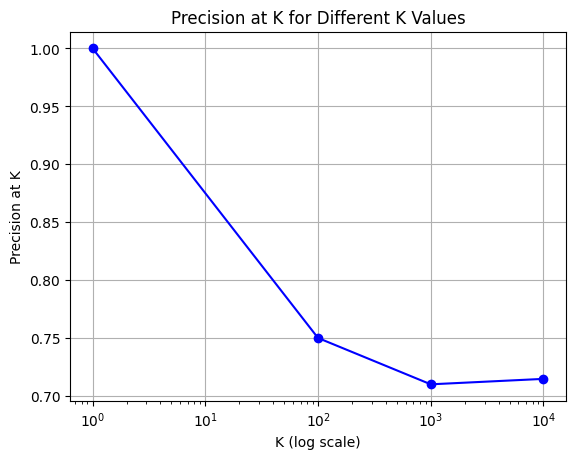

In [44]:
plt.plot(K_values, precs, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('K (log scale)')
plt.ylabel('Precision at K')
plt.title('Precision at K for Different K Values')
plt.grid(True)
plt.show()

In [45]:
answers['Q6'] = precs

In [46]:
assertFloatList(answers['Q6'], 4)

In [47]:
### Question 7

In [48]:
X = df[['review_length', 'beer/ABV', 'review/aroma']]
y = df['binarized_rating']

In [49]:
model = linear_model.LogisticRegression(class_weight='balanced')
model.fit(X, y)

LogisticRegression(class_weight='balanced')

In [50]:
y_pred = model.predict(X)
its_test_MSE = mean_squared_error(y, y_pred)

In [51]:
print("Model MSE is:", its_test_MSE)

Model MSE is: 0.2469


In [52]:
answers['Q7'] = ["I reduced the model error by incorporating more features. Specifically, I added 'beer/ABV' and 'review/aroma' as I believed those would play a large factor in the overall review number.", its_test_MSE]

In [53]:
f = open("answers_hw1.txt", 'w')
f.write(str(answers) + '\n')
f.close()